In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.subplots as sp
import math, copy

# Univariate Linear Regreesion

## Data to Predict

* Target is to fit a linear regression model through the following points, in order to predict the price for other houses

<table>
    <tr>
        <th>Size (1000 sqm)</th>
        <th>Price (1000s of euro)</th>
    </tr>
    <tr>
        <td>1.0</td>
        <td>300</td>
    </tr>
    <tr>
        <td>2.0</td>
        <td>500</td>
    </tr>
    <tr>
        <td>1.5</td>
        <td>350</td>
    </tr>
    <tr>
        <td>2.5</td>
        <td>550</td>
    </tr>
    <tr>
        <td>3.0</td>
        <td>650</td>
    </tr>
    <tr>
        <td>3.5</td>
        <td>750</td>
    </tr>
    <tr>
        <td>4.0</td>
        <td>850</td>
    </tr>
</table>


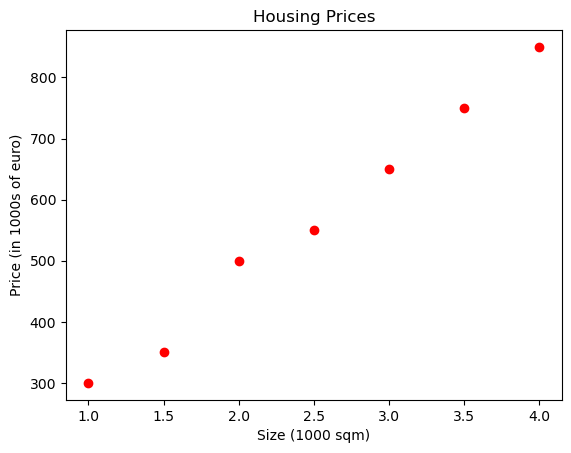

In [70]:
# data
x_train = np.array([1.0, 2.0, 1.5, 2.5, 3.0, 3.5, 4.0])
y_train = np.array([300.0, 500.0, 350.0, 550.0, 650.0, 750.0, 850.0])

# data plot
plt.scatter(x_train, y_train, marker="o", c="r")
plt.title("Housing Prices")
plt.ylabel("Price (in 1000s of euro)")
plt.xlabel("Size (1000 sqm)")
plt.show()

## Model Prediction

* The model function is represented as: $$ f_{w,b}(x^{(i)}) = wx^{(i)} + b$$
* where:
    * $w$ or weight represents the **slope** of the line
    * $b$ or bias represents the **intercept** of the line

### Compute model prediction

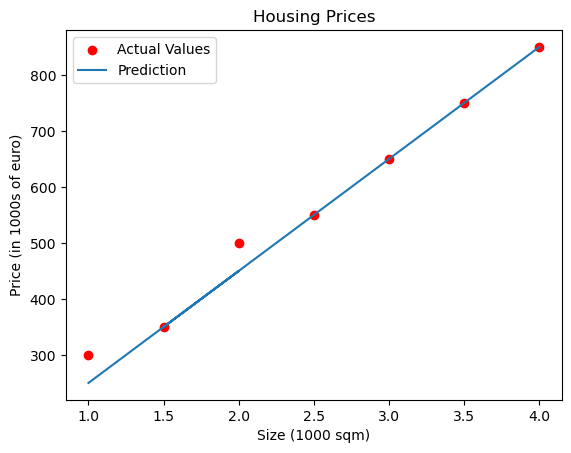

In [73]:
def compute_model_prediction(x, w, b):
    """ x = the feature array
        w = weight
        b = bias
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b

    # return model prediction
    return f_wb

# data
x_train = np.array([1.0, 2.0, 1.5, 2.5, 3.0, 3.5, 4.0])
y_train = np.array([300.0, 500.0, 350.0, 550.0, 650.0, 750.0, 850.0])

w = 200  # weight
b = 50  # bias
res_f_wb = compute_model_prediction(x_train, w, b)

# plot data points
plt.scatter(x_train, y_train, marker="o", c="r", label="Actual Values")

# plot model prediction
plt.plot(x_train, res_f_wb, label="Prediction")

plt.title("Housing Prices")
plt.ylabel("Price (in 1000s of euro)")
plt.xlabel("Size (1000 sqm)")
plt.legend()
plt.show()

### Prediction

In [75]:
w = 200
b = 50
feat_val = 1.7
cost_feat_val = w * feat_val + b

print(f"House with 1700 sqm costs {cost_feat_val:.0f}k euro")

House with 1700 sqm costs 390k euro


## MSE cost function

* Mean Squared Error measures how well a ML model's predictions match the actual target values
* Equation: $$J(\theta) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (h_{\theta}(x^{(i)}) - y^{(i)})^2$$
* where:
    * $\theta$ = ${(w,b)}$
    * $J(\theta)$ = the cost function
    * $m$ = the number of training examples
    * $h_{\theta}(x^{(i)})$ = the model's predicted value for the $i$-th training example. can be noted as $f_{w,b}(x^{(i)})$ 
    * $y^{(i)})$ = the  target value
    * The squared differences $(h_{\theta}(x^{(i)}) - y^{(i)})^2$ measure how far off the predictions are
    * The sum is taken ovver all $m$ examples, and dividing by $2m$ ensures that the gratiend of the function, used in optimization, is simpler
<hr>
* Why It’s Useful in Machine Learning:
    * **Quantifies Error**: The cost function provides a single number representing the model's performance. A lower cost means better predictions
    * **Guides Optimization**: In training, machine learning models adjust their parameters (like $\theta$) to minimize the cost function, improving accuracy
    * **Convex and Differentiable**: The function is convex for linear regression, making it easier to find the global minimum using gradient descent
    * **Penalizes Large Errors**: Squaring the error gives more weight to larger mistakes, ensuring that big errors have a strong impact on learning
<hr>
* Why Divide by $2m$?
    * The division by $m$ ensures that the cost function represents the average squared error, making it independent of dataset size
    * The factor $\frac{1}{2m}$ simplifies the derivative during gradient descent, avoiding an extra factor of 2 when differentiating

    

In [77]:
# function to compute cost for linear regression
def compute_cost(x, y, w, b):
    """ x = feature vector
        w = weight scalar
        b = bias scalar

        shorthand using numpy:
        np.sum((w * x + b - y) ** 2) / (2 * m)
    """
    m = x.shape[0]  # number of training examples
    cost_sum = 0  # initialize cost sum

    for i in range(m):  # loop through all training examples
        f_wb = w * x[i] + b  # compute the prediction
        cost = (f_wb - y[i]) ** 2  # compute squared error
        cost_sum += cost  # accumulate cost

    total_cost = (1 / (2 * m)) * cost_sum  # compute final cost
    return total_cost  # return the computed cost

### Cost function intuition

* The goal in machine learning is to minimize the cost function, meaning we want to keep decreasing it during training
    * If the model is improving, $J(\theta)$ decreases overtime
    * If the model is performing poorly, $J(\theta)$ stays high or increases, meaning that the model is not learning well, or it's diverging


In [79]:
# data
x_train = np.array([1.0, 2.0, 1.5, 2.5, 3.0, 3.5, 4.0])
y_train = np.array([300.0, 500.0, 350.0, 550.0, 650.0, 750.0, 850.0])

# initialize parameters
w_values = np.arange(0, 410, 5)  # range of w values
b = 50  # initial bias

# compute cost for each w
cost_values = [compute_cost(x_train, y_train, w, b) for w in w_values]

# initial weight
initial_w = 10
f_wb = initial_w * x_train + b  # initial predictions

# create subplots
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=("Housing Prices", "Cost vs w"))

# left plot: Housing Prices
scatter_actual = go.Scatter(x=x_train, y=y_train, mode="markers", marker=dict(color="darkred", size=10), name="Actual Value")
line_prediction = go.Scatter(x=x_train, y=f_wb, mode="lines", line=dict(color="darkblue"), name=f"Prediction")

# right plot: Cost vs W
cost_curve = go.Scatter(x=w_values, y=cost_values, mode="lines", line=dict(color="blue"), name="Cost Function")
cost_point = go.Scatter(x=[initial_w], y=[compute_cost(x_train, y_train, initial_w, b)],
                        mode="markers", marker=dict(color="red", size=10), name="Cost at w")

# add traces to figure
fig.add_trace(scatter_actual, row=1, col=1)
fig.add_trace(line_prediction, row=1, col=1)
fig.add_trace(cost_curve, row=1, col=2)
fig.add_trace(cost_point, row=1, col=2)

# create slider steps
steps = []
for w in w_values:
    f_wb_new = w * x_train + b
    step = dict(
        method="update",
        args=[{"x": [x_train, x_train, w_values, [w]],  # update x-values
               "y": [y_train, f_wb_new, cost_values, [compute_cost(x_train, y_train, w, b)]]},  # update y-values
              {"title.text": f"Prediction with w={w}"}]  # update title
    )

    steps.append(step)

# add slider
fig.update_layout(
    sliders=[{
        "active": 0,
        "currentvalue": {"prefix": "w: ", "font": {"size": 16}},
        "steps": steps
    }],
    title="Linear Regression Cost Function Visualization",
    showlegend=True,
    width=800,
    height=300
)

fig.show()

## Gradient Descent 

* Gradient descent is an optimization algorithm used in machine learning to minimize a cost function by iteratively adjusting the model parameters
* It helps find the optimal values for **weights** and **bias** in order to reduce the error in predictions
* It updates the parameters in the direction of the steepest descent, which is given by the negative of the gradient of the cost function
  
$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
* where:
    * $\alpha$ = learning rate (controls the step size)
    * parameters $w$, $b$ are updated simultaneously
<br><br>The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})\\
\end{align}
$$

* Conventionally, $\frac{\partial J(w,b)}{\partial b}$  will be noted as `dj_db`
* The larger $\alpha$ is, the faster gradient descent will converge to a solution, but if it's too large, gradient descent will diverge
<br>
* Convergence and Stopping Criteria:
    * The change in the cost function is below a predefined threshold
    * A fixed number of iterations is reached
    * The gradient itself becomes very small, indicating a local minimum


### Compute Gradiend Descent

In [82]:
# function to compute the gradient for linear regression
def compute_gradient(x, y, w, b):
    """ x (vector) = features
        y (vector) = target values
        w (scalar) = weight
        b (scalar) = bias

        returns:
        dj_dw (scalar) = gradient of cost w.r.t. the parameters w
        dj_db (scalar) = gradient of cost w.r.t. the parameter b 
    """
    m = x.shape[0]  # number of training examples
    dj_dw = 0  # initialize gradient for w
    dj_db = 0  # initialize gradient for b

    # Loop through all training examples
    for i in range(m):
        f_wb = w * x[i] + b  # compute prediction
        dj_dw_i = (f_wb - y[i]) * x[i]  # compute derivative w.r.t. w
        dj_db_i = f_wb - y[i]  # compute derivative w.r.t. b
        dj_db += dj_db_i  # accumulate gradient for b
        dj_dw += dj_dw_i  # accumulate gradient for w

    dj_dw = dj_dw / m  # compute average gradient for w
    dj_db = dj_db / m  # compute average gradient for b

    return dj_dw, dj_db

### Gradiend Descent operation

* The method below is an example of **Standard Batch Gradient Descent** with adaptation to grab logs at different loops

In [84]:
# function to perform gradient descent to fit w,b
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    """ x (vector) = features 
        y (vector) = target values
        w_in (scalar) = initial weight value
        b_in (scalar) = initial bias value
        alpha (float) = learning rate
        num_iters (int) = count of iterations to run gradient descent
        cost_function (func) = function to call to produce cost
        gradient_function (func) = function to call to produce gradient
      
        returns:
        w (scalar): updated value of w
        b (scalar): updated value of b
        j_logs (List): log of cost values
        p_logs (list): log of parameters [w,b] 
    """
    
    j_logs = []  # list to store cost history
    p_logs = []  # list to store parameter history
    b = b_in  # initialize b
    w = w_in  # initialize w

    # iterate for given number of iterations
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)  # compute gradient

        b = b - alpha * dj_db  # update b
        w = w - alpha * dj_dw  # update w

        if i < 100000:  # prevent excessive memory usage
            j_logs.append(cost_function(x, y, w, b))  # store cost
            p_logs.append([w, b])  # store parameters

        if i % math.ceil(num_iters / 10) == 0:  # print progress every 10% of iterations
            print(f"Iteration {i:4}: Cost {j_logs[-1]:0.2e} - dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e} - w: {w: 0.3e}, b:{b: 0.5e}")
            
    return w, b, j_logs, p_logs

### Cost vs Iteration

Iteration    0: Cost 1.49e+05 - dj_dw: -1.596e+03, dj_db: -5.643e+02 - w:  1.596e+01, b: 5.64286e+00
Iteration 1000: Cost 1.59e+02 - dj_dw:  3.911e-01, dj_db: -1.115e+00 - w:  1.889e+02, b: 9.09507e+01
Iteration 2000: Cost 1.54e+02 - dj_dw:  1.142e-01, dj_db: -3.255e-01 - w:  1.866e+02, b: 9.73582e+01
Iteration 3000: Cost 1.53e+02 - dj_dw:  3.333e-02, dj_db: -9.501e-02 - w:  1.860e+02, b: 9.92288e+01
Iteration 4000: Cost 1.53e+02 - dj_dw:  9.730e-03, dj_db: -2.774e-02 - w:  1.858e+02, b: 9.97749e+01
Iteration 5000: Cost 1.53e+02 - dj_dw:  2.840e-03, dj_db: -8.098e-03 - w:  1.857e+02, b: 9.99343e+01
Iteration 6000: Cost 1.53e+02 - dj_dw:  8.292e-04, dj_db: -2.364e-03 - w:  1.857e+02, b: 9.99808e+01
Iteration 7000: Cost 1.53e+02 - dj_dw:  2.421e-04, dj_db: -6.901e-04 - w:  1.857e+02, b: 9.99944e+01
Iteration 8000: Cost 1.53e+02 - dj_dw:  7.067e-05, dj_db: -2.015e-04 - w:  1.857e+02, b: 9.99984e+01
Iteration 9000: Cost 1.53e+02 - dj_dw:  2.063e-05, dj_db: -5.881e-05 - w:  1.857e+02, b: 9.

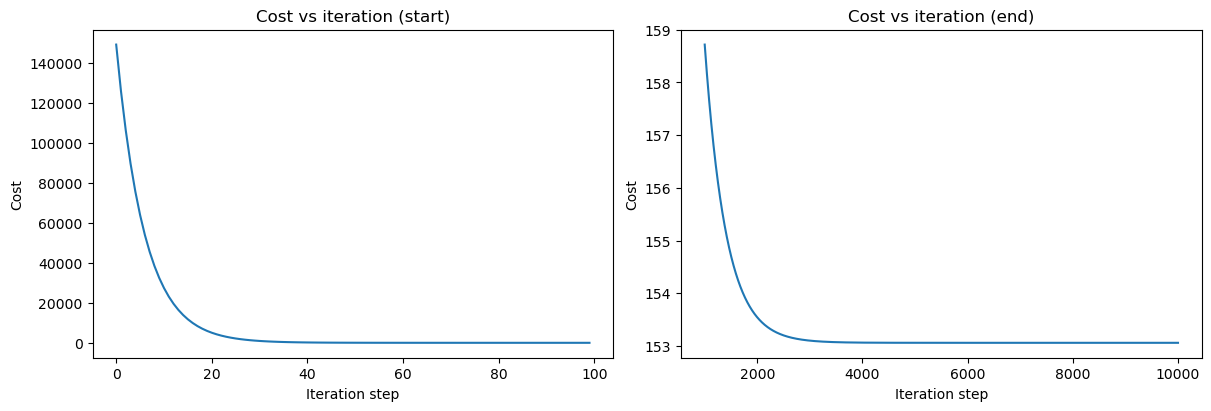

In [86]:
# training data
x_train = np.array([1.0, 2.0, 1.5, 2.5, 3.0, 3.5, 4.0])
y_train = np.array([300.0, 500.0, 350.0, 550.0, 650.0, 750.0, 850.0])

# initialize parameters
w_init = 0  # initial weight
b_init = 0  # initial bias

# set gradient descent parameters
iterations = 10000  # count of iterations
alpha = 1.0e-2  # learning rate

# run gradient descent
w_final, b_final, j_logs, p_logs = gradient_descent(x_train, y_train, w_init, b_init, alpha,
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

# plot cost vs iterations
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))

# initial cost values
ax1.plot(j_logs[:100])

# later cost values
ax2.plot(1000 + np.arange(len(j_logs[1000:])), j_logs[1000:])

ax1.set_ylabel("Cost")
ax1.set_xlabel("Iteration step")
ax1.set_title("Cost vs iteration (start)")

ax2.set_title("Cost vs iteration (end)")
ax2.set_xlabel("Iteration step")
ax2.set_ylabel("Cost")

plt.show()

### Predictions

In [88]:
pred_list = np.linspace(1.0, 4.0, 15)

for p in pred_list:
    print(f"Price of a {p * 1000:0.0f} sqm house = prediction {w_final * p + b_final:0.0f}k euro")

Price of a 1000 sqm house = prediction 286k euro
Price of a 1214 sqm house = prediction 326k euro
Price of a 1429 sqm house = prediction 365k euro
Price of a 1643 sqm house = prediction 405k euro
Price of a 1857 sqm house = prediction 445k euro
Price of a 2071 sqm house = prediction 485k euro
Price of a 2286 sqm house = prediction 524k euro
Price of a 2500 sqm house = prediction 564k euro
Price of a 2714 sqm house = prediction 604k euro
Price of a 2929 sqm house = prediction 644k euro
Price of a 3143 sqm house = prediction 684k euro
Price of a 3357 sqm house = prediction 723k euro
Price of a 3571 sqm house = prediction 763k euro
Price of a 3786 sqm house = prediction 803k euro
Price of a 4000 sqm house = prediction 843k euro


# Multiple linear regression

## Data to Predict

<table>
    <tr>
        <th>Size (sqm)</th>
        <th>No. of bedrooms</th>
        <th>No. of floors</th>
        <th>Age in years</th>
        <th>Price in 1Ks of euro</th>
    </tr>
    <tr>
        <td>2104</td>
        <td>5</td>
        <td>1</td>
        <td>45</td>
        <td>460</td>
    </tr>
    <tr>
        <td>1416</td>
        <td>3</td>
        <td>2</td>
        <td>40</td>
        <td>232</td>
    </tr>
    <tr>
        <td>852</td>
        <td>2</td>
        <td>1</td>
        <td>35</td>
        <td>178</td>
    </tr>
    <tr>
        <td>3000</td>
        <td>4</td>
        <td>2</td>
        <td>20</td>
        <td>500</td>
    </tr>
    <tr>
        <td>1800</td>
        <td>3</td>
        <td>1</td>
        <td>15</td>
        <td>280</td>
    </tr>
    <tr>
        <td>1200</td>
        <td>2</td>
        <td>1</td>
        <td>10</td>
        <td>200</td>
    </tr>
    <tr>
        <td>2500</td>
        <td>4</td>
        <td>3</td>
        <td>30</td>
        <td>420</td>
    </tr>
    <tr>
        <td>1000</td>
        <td>2</td>
        <td>1</td>
        <td>5</td>
        <td>150</td>
    </tr>
    <tr>
        <td>2700</td>
        <td>5</td>
        <td>2</td>
        <td>25</td>
        <td>480</td>
    </tr>
    <tr>
        <td>1300</td>
        <td>3</td>
        <td>1</td>
        <td>8</td>
        <td>220</td>
    </tr>
</table>


In [92]:
x_train = np.array([
    [2104, 5, 1, 45],
    [1416, 3, 2, 40],
    [852, 2, 1, 35],
    [3000, 4, 2, 20],
    [1800, 3, 1, 15],
    [1200, 2, 1, 10],
    [2500, 4, 3, 30],
    [1000, 2, 1, 5],
    [2700, 5, 2, 25],
    [1300, 3, 1, 8]
])
y_train = np.array([460, 320, 250, 700, 480, 380, 650, 400, 680, 410])

print(f" - x shape: {x_train.shape}, s type:{type(x_train)})\n - y shape: {y_train.shape}, y type:{type(y_train)})")

 - x shape: (10, 4), s type:<class 'numpy.ndarray'>)
 - y shape: (10,), y type:<class 'numpy.ndarray'>)


## Model Prediction

The model's prediction with multiple variables is given by the linear model:
$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b$$
which results in:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b$$ 
where:
* $w$ = **weights** vector
* $x$ = **features** vector 
* $b$ = bias
* $\cdot$ = dot product

In [94]:
b_init = 500.0
w_init = np.array([0.5, 20.0, -50.0, -30.0])

# single predict using linear regression
def predict_single_loop(x, w, b):
    """ x = feature vector
        w = weight vector
        b = bias

        shorthand using numpy:
        return np.dot(x, w) + b
    """
    n = x.shape[0]
    p = 0
    for i in range(n):
        p_i = x[i] * w[i]
        p = p + p_i
    p = p + b
    return p

# get the 8th row col values
x_8th = x_train[7, :]
print(f"x_8th shape {x_8th.shape}, x_8th value: {x_8th}")

# make a prediction based on the 8th row
f_wb = predict_single_loop(x_8th, w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_8th shape (4,), x_8th value: [1000    2    1    5]
f_wb shape (), prediction: 840.0


## MSE cost function

The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b$$ 
* where $\mathbf{w}$ and $\mathbf{x}^{(i)}$ are vectors

In [96]:
def compute_cost(x, y, w, b):
    """ x = feature vector
        w = weight scalar
        b = bias scalar

        shorthand using numpy:
        np.sum((w * x + b - y) ** 2) / (2 * m)
    """
    m = x.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(x[i], w) + b 
        cost = cost + (f_wb_i - y[i]) ** 2 
    cost = cost / (2 * m)  
    return cost


# Compute and display cost using our pre-chosen optimal parameters.
cost = compute_cost(x_train, y_train, w_init, b_init)
print(f"Cost at optimal w : {cost}")

Cost at optimal w : 91126.2


## Gradient Descent

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

* where, $n$ is the number of features
* $w_j$,  $b$, are updated simultaneously, where:

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}\\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) 
\end{align}
$$
* where:
    * m is the number of training examples in the data set    
    *  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value

### Compute Gradient Descent

In [100]:
def compute_gradient(x, y, w, b):
    """ x (vector) = features
        y (vector) = target values
        w (scalar) = weight
        b (scalar) = bias

        returns:
        dj_dw (scalar) = gradient of cost w.r.t. the parameters w
        dj_db (scalar) = gradient of cost w.r.t. the parameter b 
    """
    m, n = x.shape  #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.0

    for i in range(m):
        err = (np.dot(x[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * x[i, j]
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw


#Compute and display gradient
tmp_dj_db, tmp_dj_dw = compute_gradient(x_train, y_train, w_init, b_init)
print(f"dj_db at initial w,b: {tmp_dj_db}")
print(f"dj_dw at initial w,b: \n {tmp_dj_dw}")

dj_db at initial w,b: 212.6
dj_dw at initial w,b: 
 [4.694768e+05 7.146000e+02 3.134000e+02 8.700000e+02]


### Gradient Descent Operation

In [102]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """ x (vector) = features 
        y (vector) = target values
        w_in (scalar) = initial weight value
        b_in (scalar) = initial bias value
        alpha (float) = learning rate
        num_iters (int) = count of iterations to run gradient descent
        cost_function (func) = function to call to produce cost
        gradient_function (func) = function to call to produce gradient
      
        returns:
        w (scalar): updated value of w
        b (scalar): updated value of b
        j_logs (vector): log of cost values
      """

    # An array to store cost J and w's at each iteration primarily for graphing later
    j_logs = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w, b)  ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw  ##None
        b = b - alpha * dj_db  ##None

        # Save cost J at each iteration
        if i < 100000:  # prevent resource exhaustion
            j_logs.append(cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {j_logs[-1]:8.2f}   ")

    return w, b, j_logs  #return final w,b and j_logs for graphing

### Cost vs Iteration

In [104]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 5.0e-7
# run gradient descent 
w_final, b_final, j_logs = gradient_descent(x_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = x_train.shape
for i in range(m):
    print(f"prediction: {np.dot(x_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost 90052.18   
Iteration  100: Cost  2305.92   
Iteration  200: Cost  2302.56   
Iteration  300: Cost  2299.26   
Iteration  400: Cost  2296.03   
Iteration  500: Cost  2292.86   
Iteration  600: Cost  2289.75   
Iteration  700: Cost  2286.71   
Iteration  800: Cost  2283.73   
Iteration  900: Cost  2280.80   
b,w found by gradient descent: 0.01,[ 0.25630899  0.00320842  0.00460613 -0.12186145] 
prediction: 533.82, target value: 460
prediction: 358.09, target value: 320
prediction: 214.13, target value: 250
prediction: 766.52, target value: 700
prediction: 459.55, target value: 480
prediction: 306.37, target value: 380
prediction: 637.15, target value: 650
prediction: 255.72, target value: 400
prediction: 689.02, target value: 680
prediction: 332.25, target value: 410


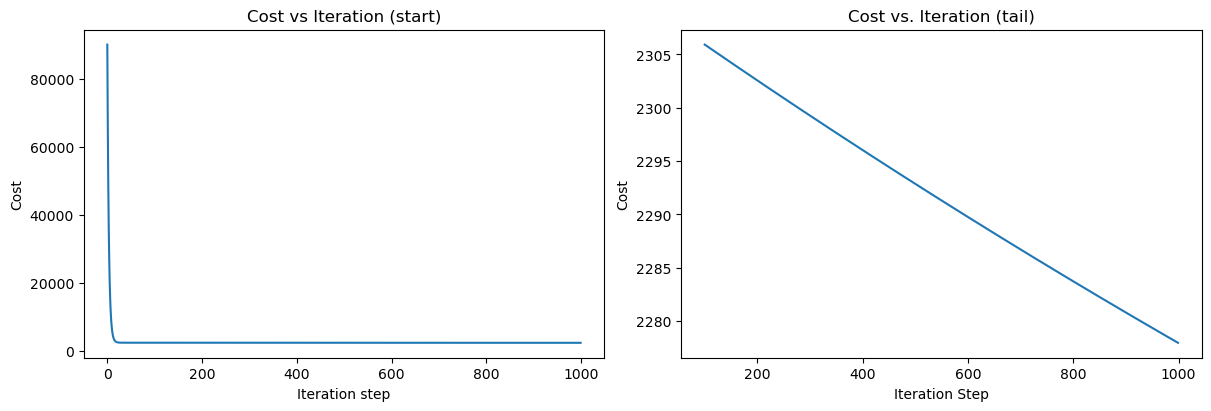

In [105]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(j_logs)
ax2.plot(100 + np.arange(len(j_logs[100:])), j_logs[100:])
ax1.set_title("Cost vs Iteration (start)")
ax1.set_ylabel("Cost")
ax1.set_xlabel("Iteration step")

ax2.set_title("Cost vs. Iteration (tail)")
ax2.set_ylabel("Cost")
ax2.set_xlabel("Iteration Step")
plt.show()

## Feature Scaling

* When features have vastly different scales:
    * **Large-scale features** (ex: house price in millions) will produce **large gradients**
    * **Small-scale features** (ex: no. of bedrooms) will produce **small gradients**
    * This causes **gradient descent to oscillate and converge slowly**, requiring a very small learning rate to prevent divergence

<br>

* Example without scaling:
    * Feature 1 = House size(1000 - 3000 sqm)
    * Feature 2 = No. of bedrooms (1 - 5)
    * Since house size has a much larger range than the bedrooms, the **gradient for house size will be much larger**, causing **steep updates** in one direction and **tiny updates** in another.
        * This leads to **slow convergence** or **instability**
<br>

Based on the equation:

$$w_j = w_J - \alpha \frac{\partial J}{\partial w_j}$$

* If one feature is much larger than another:
    * The gradient for the large feature dominates, leading to **large jumps**
    * The small feature updates too slowly
    * The result is a **zig-zagging path to the minimum**, requiring more iterations

<br>

* Feature Scaling Methods
    * **Standardization (Z-score normalization)**
        * Equation:
            $$x_j = \frac{x_j - \mu_j}{\sigma_j}$$
        * Centers data around 0 (mean) with a standard deviation of 1
        * Works well for data sets with normal distributions
 
    * **Min-Max Scaling (Normalization)**
        * Equation:
            $$x_j = \frac{x_j - min(x_j)}{max(x_j) - min(x_j)}$$
        *  Rescales features to [0,1]
        *  Used when features have bounded ranges
<br>

* Effect of Feature Scaling
    * Faster and smoother convergence of gradient descent
    * More stable updates (no large jumps)
    * Enables using a larger learning rate without instability

### Z-score normalization

# References

## Gradient Descent Types

<table>
    <tr>
        <th>Type</th>
        <th>Update Frequency</th>
        <th>Strengths</th>
        <th>Weaknesses</th>
    </tr>
    <tr>
        <td>Batch GD</td>
        <td>Entire dataset</td>
        <td>Stable convergence</td>
        <td>Slow for large data</td>
    </tr>
    <tr>
        <td>SGD</td>
        <td>Single sample</td>
        <td>Fast updates</td>
        <td>Noisy, less stable</td>
    </tr>
    <tr>
        <td>Mini-Batch GD</td>
        <td>Small batch</td>
        <td>Balance of BGD & SGD</td>
        <td>Needs tuning of batch size</td>
    </tr>
    <tr>
        <td>Momentum GD</td>
        <td>Entire dataset</td>
        <td>Reduces oscillations</td>
        <td>May overshoot minima</td>
    </tr>
    <tr>
        <td>NAG</td>
        <td>Entire dataset</td>
        <td>Faster than Momentum</td>
        <td>More complex</td>
    </tr>
    <tr>
        <td>Adagrad</td>
        <td>Adaptive</td>
        <td>No manual tuning</td>
        <td>Learning rate decays fast</td>
    </tr>
    <tr>
        <td>RMSprop</td>
        <td>Adaptive</td>
        <td>Solves Adagrad decay</td>
        <td>Still needs tuning</td>
    </tr>
    <tr>
        <td>Adam</td>
        <td>Adaptive + Momentum</td>
        <td>Best of both worlds</td>
        <td>More computation</td>
    </tr>
</table>


### Batch
* Computes the gradient using the entire dataset at each iteration:
* Equation:
$$w = w -  \alpha \frac{1}{m}  \sum\limits_{i = 0}^{m-1} \frac{\partial J(w,b)}{\partial w}$$

* Characteristics:
    * More stable convergence
    * Computationally expensive for large data sets

In [111]:
def batch_gradient_descent(x, y, w, b, alpha, num_iters):
    m = x.shape[0]
    for _ in range(num_iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        
        w -= alpha * dj_dw
        b -= alpha * dj_db
    return w, b

### Stochastic (SGD)

* Updates the parameters after computing the gradient from a single randomly chosen data point
* Equation:
$$w = w - \alpha \frac{\partial J(w,b)}{\partial w}$$

* Characteristics:
    * Faster updates per iteration
    * Noisy updates, which means it's less stable than **Batch GD**
    * CAn escape local minima due to randomness
    * Suitable for large data sets

In [113]:
def stochastic_gradient_descent(x, y, w, b, alpha, num_iters):
    m = x.shape[0]
    for _ in range(num_iters):
        i = np.random.randint(m)  # pick a random training example
        dj_dw, dj_db = compute_gradient(x[i:i+1], y[i:i+1], w, b)  # use only one sample
        
        w -= alpha * dj_dw
        b -= alpha * dj_db
    return w, b

### Mini-Batch

* Divides the dataset into small batches and computes the gradient using each batch
* Equation:
$$w = w - \alpha \frac{1}{b} \sum\limits_{i\in b} \frac{\partial J(w,b)}{\partial w}$$
* where:
    * $b$ is the batch size

<br>

* Characteristics:
    * Balances efficiency and stability
    * Faster than **Batch GD**
    * Less noisy than **SGD**
    * Works well in DL apps

In [115]:
def mini_batch_gradient_descent(x, y, w, b, alpha, num_iters, batch_size):
    m = x.shape[0]
    for _ in range(num_iters):
        indices = np.random.choice(m, batch_size, replace=False)  # select a batch
        x_batch = x[indices]
        y_batch = y[indices]
        dj_dw, dj_db = compute_gradient(x_batch, y_batch, w, b)
        
        w -= alpha * dj_dw
        b -= alpha * dj_db
    return w, b

### Momentum-based

* Uses past gradients to smooth updates and prevent oscillations
* Equation:
$$v_w = \beta v_w + (1- \beta) \frac{\partial J}{\partial w}$$
$$w = w - \alpha v_w$$

* where:
    * $v_w$ = momentum of $w$, which is exponentially weighted moving average of past gradients for $w$
    * $\beta$ = momentum coefficient

<br>

* $\beta$ poperties:
    * Higher `beta` (ex: 0.9 - 0.99):
        * More reliance on past gradients (strong momentum)
        * Faster convergence but may overshoot the minimum
    * Lower `beta` (ex: 0.5 - 0.8)
        * Less reliance on past gradients (weak momentum)
        * More responsive to sudden gradient changes
        * Might be better for noisy or non-stationary problems

<br>

* Characteristics:
    * Helps in faster convergence
    * Reduces oscillations in high-dimensional spaces
    * Commonly used in DL

In [117]:
def momentum_gradient_descent(x, y, w, b, alpha, num_iters, beta=0.9):
    v_w, v_b = 0, 0  # initialize momentum variables
    for _ in range(num_iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        v_w = beta * v_w + (1 - beta) * dj_dw
        v_b = beta * v_b + (1 - beta) * dj_db
        w -= alpha * v_w
        b -= alpha * v_b
    return w, b

### Nesterov Accelerated Gradient (NAG)

### Adagrad (Adaptive Gradient Algorithm)

### RMSprop (Root Mean Square Propagation)

### Adam (Adaptive Moment Estimation)